## Create Complex Network

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np
import pandas as pd

In [3]:
# Make Networks
ba = nx.barabasi_albert_graph(n=500, m=2)
ws = nx.watts_strogatz_graph(n=500, k=4, p=0.1)
er = nx.erdos_renyi_graph(n=500, p=0.01)

In [3]:
def print_network_properties(G, name):
    print(f"\n Network Feature {name}:")
    print(f"\n Nodes: {G.number_of_nodes()}")
    print(f"\n Edges: {G.number_of_edges()}")
    print(f"\n Average Clustering Coefficient: {nx.average_clustering(G):.4f}")
    print(f"\n Average Path Length: {nx.average_shortest_path_length(G):.4f}")

In [4]:
print_network_properties(ba, "Barabási-Albert")


 Network Feature Barabási-Albert:

 Nodes: 1000

 Edges: 1996

 Average Clustering Coefficient: 0.0250

 Average Path Length: 4.1170


In [5]:
print_network_properties(ws, "Watts-Strogatz")


 Network Feature Watts-Strogatz:

 Nodes: 1000

 Edges: 2000

 Average Clustering Coefficient: 0.3792

 Average Path Length: 8.8495


In [6]:
print_network_properties(er, "Erdős-Rényi")


 Network Feature Erdős-Rényi:

 Nodes: 1000

 Edges: 49911

 Average Clustering Coefficient: 0.1001

 Average Path Length: 1.9001


In [28]:
def analyze_network(G, name):
    print(f'Number of Nodes: {G.number_of_nodes()}')
    print(f'Number of Edges: {G.number_of_edges()}')
    print(f'Density: {nx.density(G):.4f}')
    print(f'Average Clustering: {nx.average_clustering(G):.4f}')

    if nx.is_connected(G):
        print(f'Average Path Length: {nx.average_shortest_path_length(G):.4f}')
        print(f'Network Diameter: {nx.diameter(G)}')
        print(f'Network Radius: {nx.radius(G)}')
    else:
        print("Network is not Connected.")
    
    # Centrality Measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

    print(f"Degree Centrality: {max(degree_centrality.values()):.4f}")
    print(f"Betweenness Centrality: {max(betweenness_centrality.values()):.4f}")
    print(f"Closeness Centrality: {max(closeness_centrality.values()):.4f}")
    print(f"EigenVector Centrality: {max(eigenvector_centrality.values()):.4f}")

    # Connected Parts
    components = list(nx.connected_components(G))
    print(f'Number of Connected Parts: {len(components)}')
    print(f'Length of Biggest Part: {len(max(components, key=len))}')

    # Assortativity 
    print(f'Assortativity: {nx.degree_assortativity_coefficient(G):.4f}')

    # Modularity (Louvain)
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)
    print(f"Modularity: {modularity:.4f}")

In [8]:
analyze_network(ba, "Barabási-Albert")

Number of Nodes: 1000
Number of Edges: 1996
Density: 0.0040
Average Clustering: 0.0250
Average Path Length: 4.1170
Network Diameter: 7
Network Radius: 5
Degree Centrality: 0.0571
Betweenness Centrality: 0.1554
Closeness Centrality: 0.3651
EigenVector Centrality: 0.3430
Number of Connected Parts: 1
Length of Biggest Part: 1000
Assortativity: -0.1239
Modularity: 0.5233


In [9]:
analyze_network(ws, "Watts-Strogatz")

Number of Nodes: 1000
Number of Edges: 2000
Density: 0.0040
Average Clustering: 0.3792
Average Path Length: 8.8495
Network Diameter: 18
Network Radius: 12
Degree Centrality: 0.0070
Betweenness Centrality: 0.0605
Closeness Centrality: 0.1454
EigenVector Centrality: 0.2777
Number of Connected Parts: 1
Length of Biggest Part: 1000
Assortativity: -0.0116
Modularity: 0.8489


In [10]:
analyze_network(er, "Erdős-Rényi")

Number of Nodes: 1000
Number of Edges: 49911
Density: 0.0999
Average Clustering: 0.1001
Average Path Length: 1.9001
Network Diameter: 3
Network Radius: 2
Degree Centrality: 0.1261
Betweenness Centrality: 0.0014
Closeness Centrality: 0.5337
EigenVector Centrality: 0.0399
Number of Connected Parts: 1
Length of Biggest Part: 1000
Assortativity: 0.0017
Modularity: 0.0812


## Plots

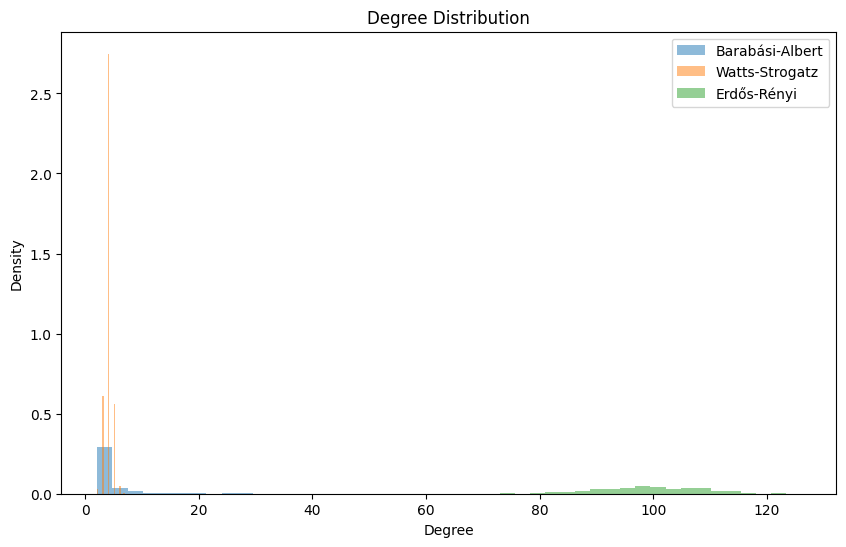

In [11]:
def plot_degree_distribution(G, name):
    degrees = [d for n, d in G.degree()]
    plt.hist(degrees, bins=20, density=True, alpha=0.5, label=name)
    plt.xlabel("Degree")
    plt.ylabel("Density")
    plt.title("Degree Distribution")
    plt.legend()

plt.figure(figsize=(10, 6))
plot_degree_distribution(ba, "Barabási-Albert")
plot_degree_distribution(ws, "Watts-Strogatz")
plot_degree_distribution(er, "Erdős-Rényi")
plt.show()

## SIR (Susceptible-Infected-Recovered)

In [4]:
# Define some parameters
N = 500
beta = 0.3
gamma = 0.1
timesteps = 50
initial_infected = 10

In [5]:
networks = {'BA': ba, 'WS': ws, 'ER': er}

In [6]:
# SIR Sumulation
def sir_simulation(G, beta, gamma, initial_infected, timesteps):

    # Initialization
    status = {node: "S" for node in G.nodes()}
    initial_nodes = np.random.choice(G.nodes(), initial_infected, replace=False)
    for node in initial_nodes:
        status[node] = "I"
    
    S_count, I_count, R_count = [N - initial_infected], [initial_infected], [0]
    
    # Simulation
    for t in range(timesteps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == "I":
                # انتقال بیماری به همسایگان مستعد
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if status[neighbor] == "S" and np.random.random() < beta:
                        new_status[neighbor] = "I"
                # بهبود گره مبتلا
                if np.random.random() < gamma:
                    new_status[node] = "R"
        status = new_status
        
        # شمارش تعداد گره‌ها در هر حالت
        S = sum(1 for node in status if status[node] == "S")
        I = sum(1 for node in status if status[node] == "I")
        R = sum(1 for node in status if status[node] == "R")
        S_count.append(S)
        I_count.append(I)
        R_count.append(R)
        
        # توقف اگر هیچ مبتلایی باقی نمانده باشد
        if I == 0:
            break
    
    return S_count, I_count, R_count

In [7]:
results = {}
for name, G in networks.items():
    S, I, R = sir_simulation(G, beta, gamma, initial_infected, timesteps)
    results[name] = {"S": S, "I": I, "R": R}

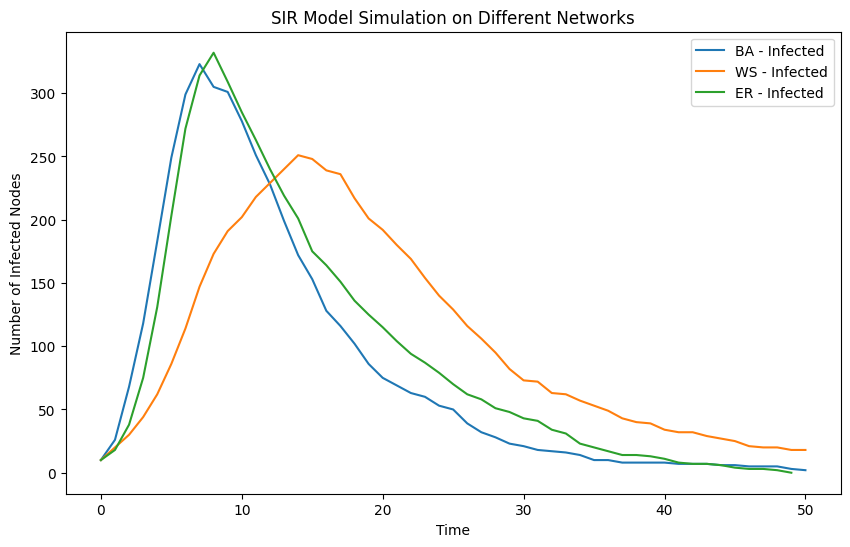

In [34]:
plt.figure(figsize=(10, 6))
for name, data in results.items():
    plt.plot(data["I"], label=f"{name} - Infected")
plt.xlabel("Time")
plt.ylabel("Number of Infected Nodes")
plt.title("SIR Model Simulation on Different Networks")
plt.legend()
plt.show()

## Create Dataset

In [8]:
def extract_node_features(G, network_name):
    nodes_data = []
    for node in G.nodes():
        degree = G.degree(node)
        betweenness = nx.betweenness_centrality(G)[node]
        closeness = nx.closeness_centrality(G)[node]
        eigenvector = nx.eigenvector_centrality(G, max_iter=1000)[node]
        clustering = nx.clustering(G, node)
        nodes_data.append({
            'network': network_name,
            'node_id': node,
            'degree': degree,
            'betweenness_centrality': betweenness,
            'closeness_centrality': closeness,
            'eigenvector_centrality': eigenvector,
            'clustering_coefficient': clustering
        })
    return nodes_data

In [9]:
def sir_simulation_with_nodes(G, beta, gamma, initial_infected, timesteps, network_name):
    status = {node: "S" for node in G.nodes()}
    initial_nodes = np.random.choice(G.nodes(), initial_infected, replace=False)
    for node in initial_nodes:
        status[node] = "I"
    
    sir_data = []
    for t in range(timesteps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == "I":
                for neighbor in G.neighbors(node):
                    if status[neighbor] == "S" and np.random.random() < beta:
                        new_status[neighbor] = "I"
                if np.random.random() < gamma:
                    new_status[node] = "R"
        status = new_status
        
        # ذخیره وضعیت هر گره در هر گام زمانی
        for node in G.nodes():
            sir_data.append({
                'network': network_name,
                'node_id': node,
                'timestep': t,
                'status': status[node]
            })
        
        # توقف اگر هیچ مبتلایی باقی نمانده باشد
        if sum(1 for s in status.values() if s == "I") == 0:
            break
    
    return sir_data

In [37]:
all_data = []

# Barabási-Albert
network_name = 'BarabasiAlbert'
ba_nodes = extract_node_features(ba, network_name)
all_data.extend(ba_nodes)
ba_sir = sir_simulation_with_nodes(ba, beta, gamma, initial_infected, timesteps,  network_name)
all_data.extend(ba_sir)

In [38]:
df = pd.DataFrame(all_data)

In [39]:
df.head()

,network,node_id,degree,betweenness_centrality,closeness_centrality,eigenvector_centrality,clustering_coefficient,timestep,status
0,BarabasiAlbert,0,48.0,0.200735,0.414108,0.381368,0.011525,NaN,NaN
1,BarabasiAlbert,1,52.0,0.237115,0.416876,0.413878,0.012821,NaN,NaN
2,BarabasiAlbert,2,42.0,0.167805,0.389236,0.264351,0.009292,NaN,NaN
3,BarabasiAlbert,3,31.0,0.122073,0.382669,0.215155,0.017204,NaN,NaN
4,BarabasiAlbert,4,22.0,0.061375,0.348951,0.130077,0.017316,NaN,NaN


In [41]:
df.tail()

,network,node_id,degree,betweenness_centrality,closeness_centrality,eigenvector_centrality,clustering_coefficient,timestep,status
25495,BarabasiAlbert,495,NaN,NaN,NaN,NaN,NaN,49.0,R
25496,BarabasiAlbert,496,NaN,NaN,NaN,NaN,NaN,49.0,R
25497,BarabasiAlbert,497,NaN,NaN,NaN,NaN,NaN,49.0,R
25498,BarabasiAlbert,498,NaN,NaN,NaN,NaN,NaN,49.0,R
25499,BarabasiAlbert,499,NaN,NaN,NaN,NaN,NaN,49.0,R


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   network                 25500 non-null  object 
 1   node_id                 25500 non-null  int64  
 2   degree                  500 non-null    float64
 3   betweenness_centrality  500 non-null    float64
 4   closeness_centrality    500 non-null    float64
 5   eigenvector_centrality  500 non-null    float64
 6   clustering_coefficient  500 non-null    float64
 7   timestep                25000 non-null  float64
 8   status                  25000 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


In [42]:
df.to_csv('integrated_network_dataset.csv', index=False)

In [10]:
# Watts-Strogatz
ws_data = []

network_name = 'WattsStrogatz'
ws_nodes = extract_node_features(ws, network_name)
ws_data.extend(ws_nodes)
ws_sir = sir_simulation_with_nodes(ws, beta, gamma, initial_infected, timesteps, network_name)
ws_data.extend(ws_sir)

In [13]:
ws_df = pd.DataFrame(ws_data)
ws_df.to_csv('ws_integrated_network_dataset.csv', index=False)

In [14]:
# Erdős-Rényi
er_data = []

network_name = 'ErdosRenyi'
er_nodes = extract_node_features(er, network_name)
er_data.extend(er_nodes)
er_sir = sir_simulation_with_nodes(er, beta, gamma, initial_infected, timesteps, network_name)
er_data.extend(er_sir)

In [15]:
er_df = pd.DataFrame(er_data)
er_df.to_csv('er_integrated_network_dataset.csv', index=False)

In [47]:
df = pd.DataFrame(all_data)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77000 entries, 0 to 76999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   network                 77000 non-null  object 
 1   node_id                 77000 non-null  int64  
 2   degree                  2000 non-null   float64
 3   betweenness_centrality  2000 non-null   float64
 4   closeness_centrality    2000 non-null   float64
 5   eigenvector_centrality  2000 non-null   float64
 6   clustering_coefficient  2000 non-null   float64
 7   timestep                75000 non-null  float64
 8   status                  75000 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 5.3+ MB


In [50]:
df.to_csv('integrated_network_dataset3.csv', index=False)